In [19]:
from minipatch import MPForest
import functions as f
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt

In [20]:
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)



In [21]:
clf = tree.DecisionTreeClassifier()
minipatch = MPForest(clf, minipatch_m_ratio= 0.2, minipatch_n_ratio= 0.1, number_of_patches=50, oop_score=True)
minipatch.fit(X_train, y_train)
pred = minipatch.predict(X_test)
accuracy = accuracy_score(pred, y_test)
oop_error = 1 - minipatch.oop_score_
print("Accuracy = ",accuracy,"oop+error = ", oop_error)



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished


(50, 50)
Accuracy =  0.98 oop+error =  0.2931111111111111


In [24]:
m_ratios = [0.2]
n_ratios = np.arange(0.1, 1, 0.1)
oop_errors = f.wrapper(m_ratios = m_ratios, n_ratios = n_ratios, clf = clf, number_of_patches=100, X = X_train, y = y_train)




[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Don

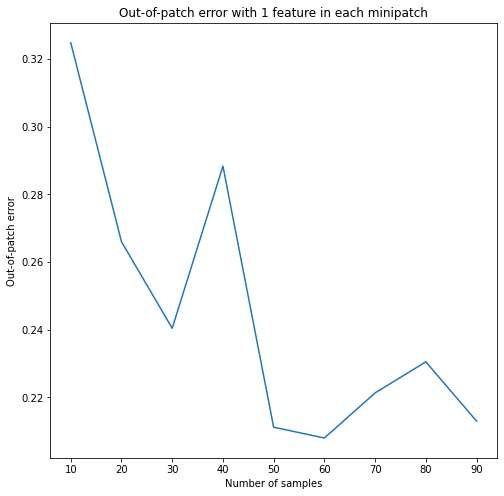

In [25]:
fig, ax = plt.subplots(1, figsize=(8,8))
ax.plot(n_ratios*100, oop_errors)
ax.set_xlabel("Number of samples")
ax.set_ylabel("Out-of-patch error")
ax.set_title("Out-of-patch error with 1 feature in each minipatch")
plt.show()

